<a href="https://colab.research.google.com/github/Abishek-Subramaniam/EDA-ECOMMERCE/blob/main/Campaign_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dataset & Preprocessing of data as required**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
campaign = pd.read_csv("/content/drive/MyDrive/Ecommerce EDA/campaign_dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/Ecommerce EDA/campaign_dataset.csv")

**DATA FEATURES**

In [5]:
# Shape of the campaign  -
print("No. of Rows : ", df.shape[0])
print("No. of Columns : ", df.shape[1])

No. of Rows :  2239
No. of Columns :  27


In [6]:
# Checking for duplicate rows -
print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


In [7]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   int64 
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [9]:
def missing_values(df):
    print("Missing Values")
    print("-"*15)
    missing = False
    for i in df.columns:
      missing_count = df[i].isna().sum()
      if missing_count > 0:
          print(f"{i} : {missing_count}")
          missing = True
    if not missing:
          print('No Missing Values in the DataFrame')

In [10]:
missing_values(df)

Missing Values
---------------
No Missing Values in the DataFrame


**Data Preprocessing (Outlier Treatment & Feature Engineering)**

In [12]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country
0,1,1964,Graduation,Married,11851,1,1,2012-09-16,93,1097,92,160,70,50,171,7,3,1,12,6,0,1,0,1,1,1,Spain
1,2,1979,Graduation,Single,32948,0,0,2016-10-04,98,142,140,582,236,77,83,4,7,10,5,16,1,1,0,1,1,1,France
2,3,1969,PhD,Widow,141866,2,2,2012-12-07,1,819,80,683,185,34,12,10,10,6,4,18,0,1,1,1,1,0,USA
3,4,1983,Graduation,Married,45873,2,1,2013-10-02,14,1577,173,294,322,81,95,18,15,13,16,6,1,0,1,0,0,1,Canada
4,5,1972,Basic,Divorced,73187,1,1,2012-02-01,92,182,195,1706,43,104,12,10,11,5,18,12,0,0,1,0,1,0,USA


In [14]:
df['Income'].isna().sum()

np.int64(0)

In [15]:
df['AcceptedAnyCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].max(axis=1)

In [16]:
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)

df[['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedAnyCmp','Marital_Status','Complain']] = \
      df[['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedAnyCmp','Marital_Status','Complain']]\
          .astype('category')

In [17]:
print(f"kidhome:",df['Kidhome'].unique())
print(f"Teenhome:",df['Teenhome'].unique())

kidhome: [1 0 2]
Teenhome: [1 0 2]


In Data description it was given as Number of Kids and Teens in the house for kidhome and teenhome. But in the actual data it seems like of Boolean indicationg whether Kids and Teens are present(bool 1) or not (bool 0) in the household. Converting these to category type

In [18]:
df[['Kidhome', 'Teenhome']] = df[['Kidhome', 'Teenhome']].astype('bool')

In [20]:
df['Age'] = 2025 - df['Year_Birth']

In [21]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

In [22]:
df["Dt_Customer"] = pd.to_datetime(df['Dt_Customer'],format='%m/%d/%y', errors='coerce')

In [23]:
df['Marital_Group'] = df['Marital_Status'].replace({
    'Married': 'In Couple', 'Together': 'In Couple',
    'Divorced': 'Alone', 'Single': 'Alone', 'Absurd': 'Alone',
    'Widow': 'Alone', 'YOLO': 'Alone'})

In [24]:
df['Tenure'] = pd.to_datetime('today').year - pd.to_datetime(df['Dt_Customer']).dt.year

**Outlier & their Treatment**

In [25]:
def calculate_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound, iqr


def outlier_remove(df):
    for col in num_columns:
        lower_bound, upper_bound, iqr = calculate_iqr(df, col)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Removing outliers
    return df

In [26]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [27]:
num_columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Tenure'],
      dtype='object')

In [30]:
def outlier_function(df):
    outlier_columns = []
    outlier_ids = set()
    for col in num_columns:
        lower_bound, upper_bound, iqr = calculate_iqr(df, col)
        df_outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if df_outlier.shape[0] > 0:
            outlier_columns.append(col)
            outlier_ids.update(df_outlier['ID'])
            print(f'{col} - {df_outlier.shape[0]}, in percentage {round((df_outlier.shape[0]/df.shape[0])*100, 2)}%')

    return outlier_columns, outlier_ids


In [31]:
outlier_columns,outlier_ids = outlier_function(df)

In [32]:
len(outlier_ids)

0

In [33]:
for col in num_columns:
    percentile_5 = np.percentile(df[col], 5)
    percentile_95 = np.percentile(df[col], 95)
    df[col] = np.round(np.clip(df[col], percentile_5, percentile_95),2)

In [34]:
outlier_columns,outlier_ids = outlier_function(df)

In [35]:
len(outlier_ids)

0

In [36]:
median_income = df['Income'].median()
df['Income_Bracket'] = pd.cut(df['Income'], bins=[0, median_income, df['Income'].max()], labels=['Below Median', 'Above Median'])

In [37]:
bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]
labels = ['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-120K', '120K-140K', '140K-160K', '160K-180K', '180K-200K']
df['Income_Bins'] = pd.cut(df['Income'], bins = bins, labels = labels)

In [38]:
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                         'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   category      
 1   Year_Birth           2239 non-null   datetime64[ns]
 2   Education            2239 non-null   category      
 3   Marital_Status       2239 non-null   category      
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   bool          
 6   Teenhome             2239 non-null   bool          
 7   Dt_Customer          0 non-null      datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   float64       
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   float64       
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-nul

**Exploratory Data Analysis**

In [40]:
len(num_columns)

15

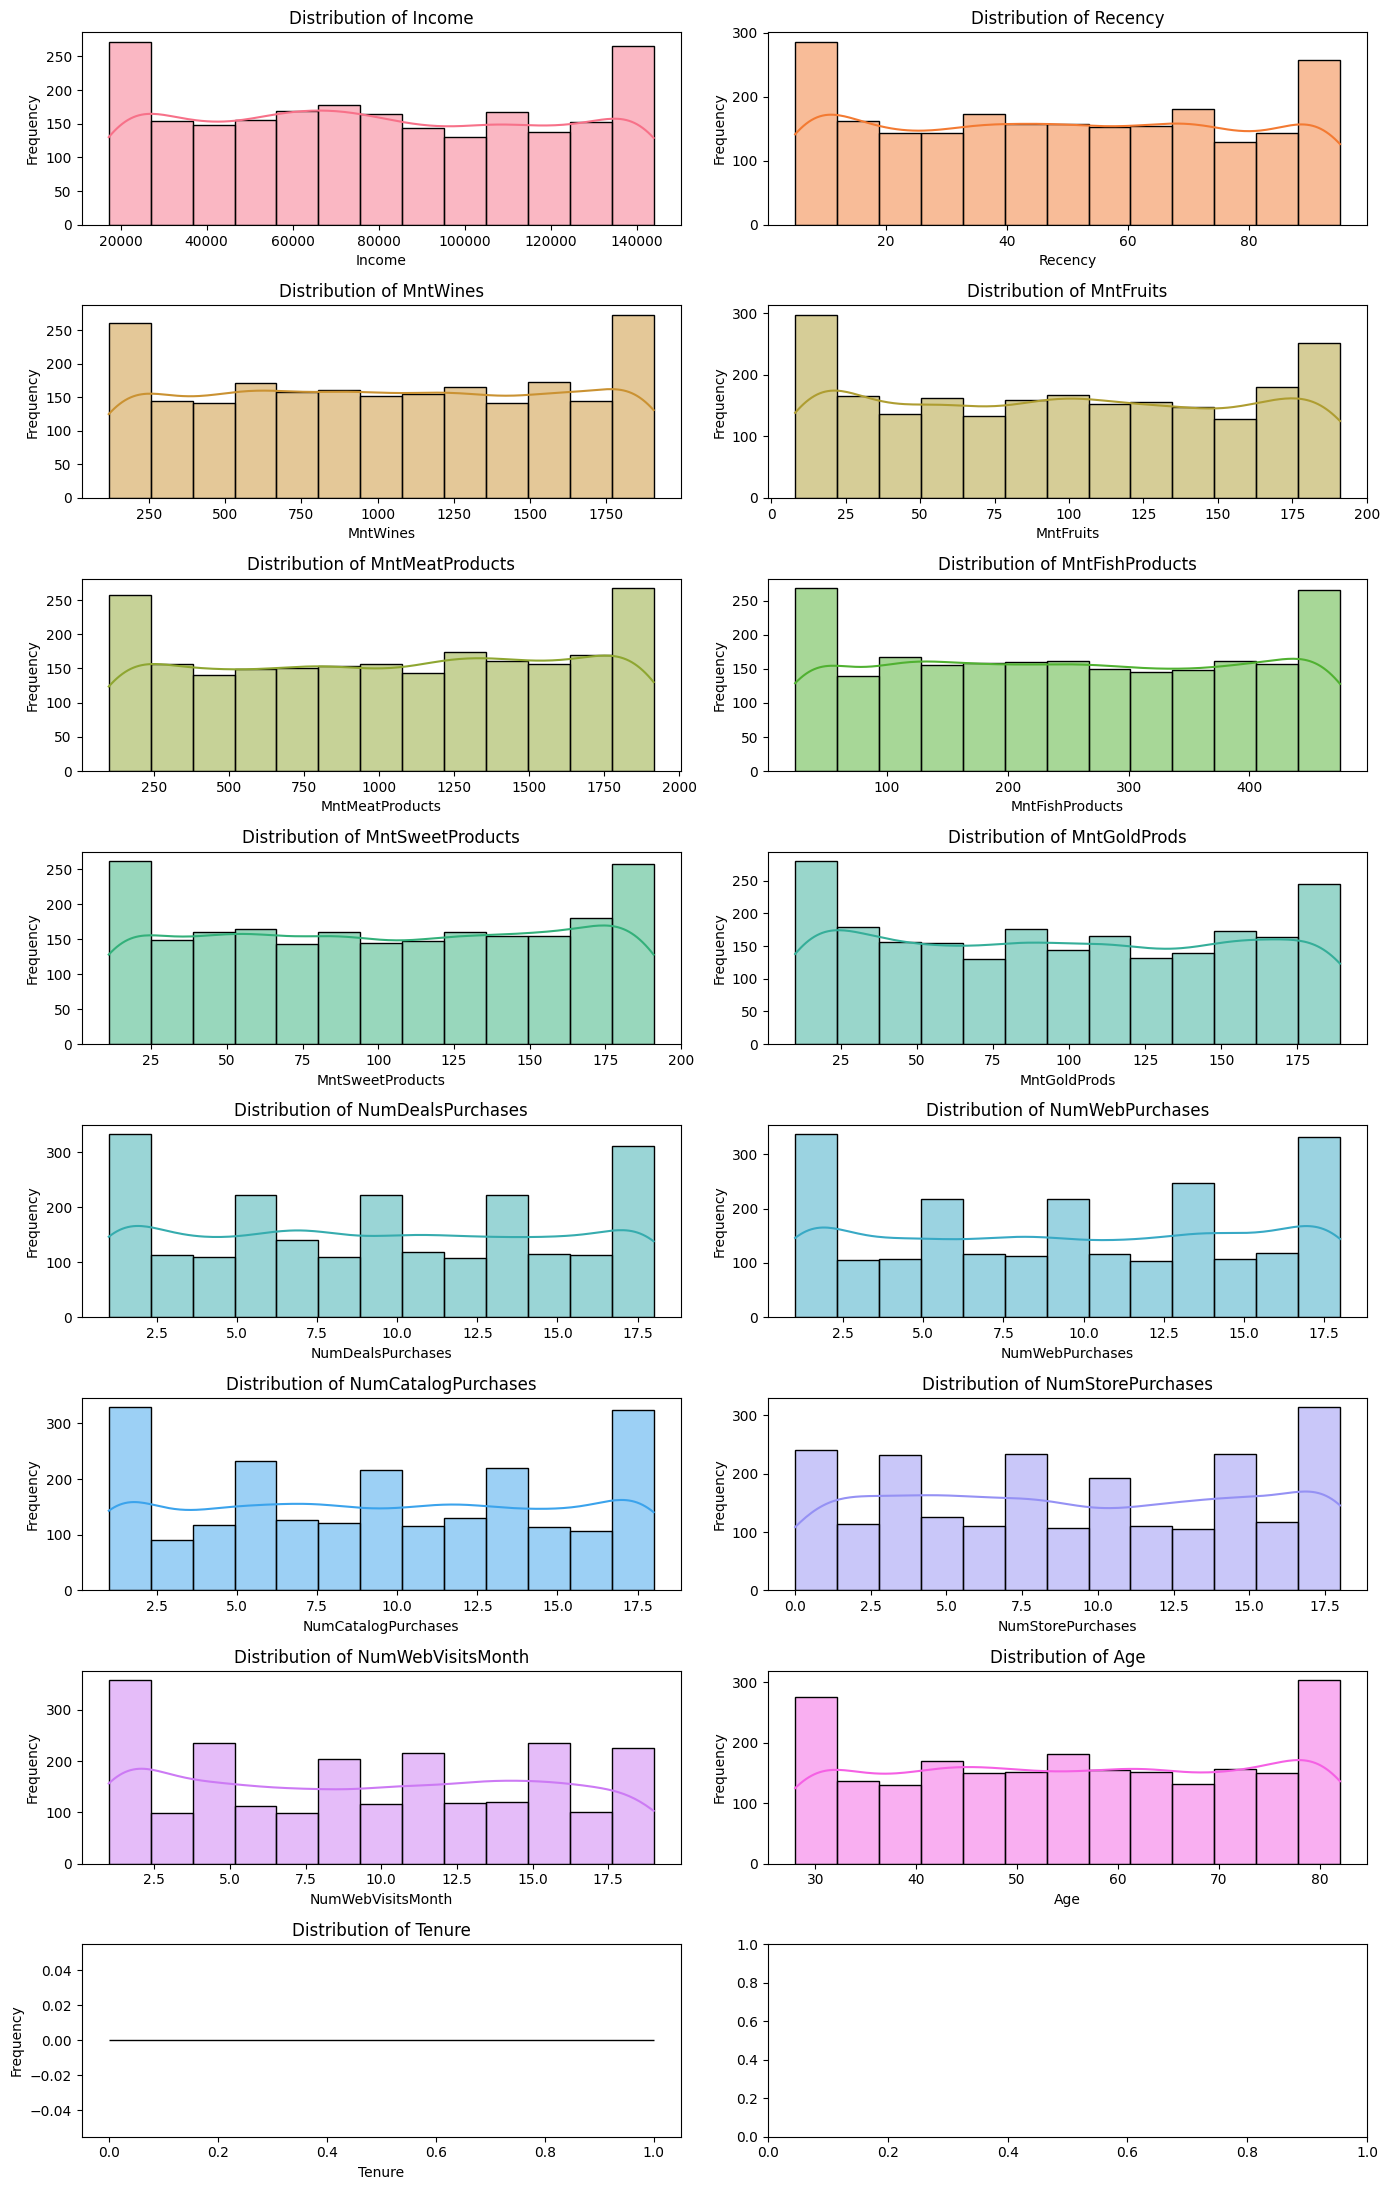

In [41]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 22))
#color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange','lightcoral', 'grey','red', 'green','hotpink']
color = sns.color_palette("husl", len(num_columns))
counter = 0

for i in range(8):
    for j in range(2):
        sns.histplot(data=df, x=num_columns[counter], kde=True, color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
        if counter == 15:
            break
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

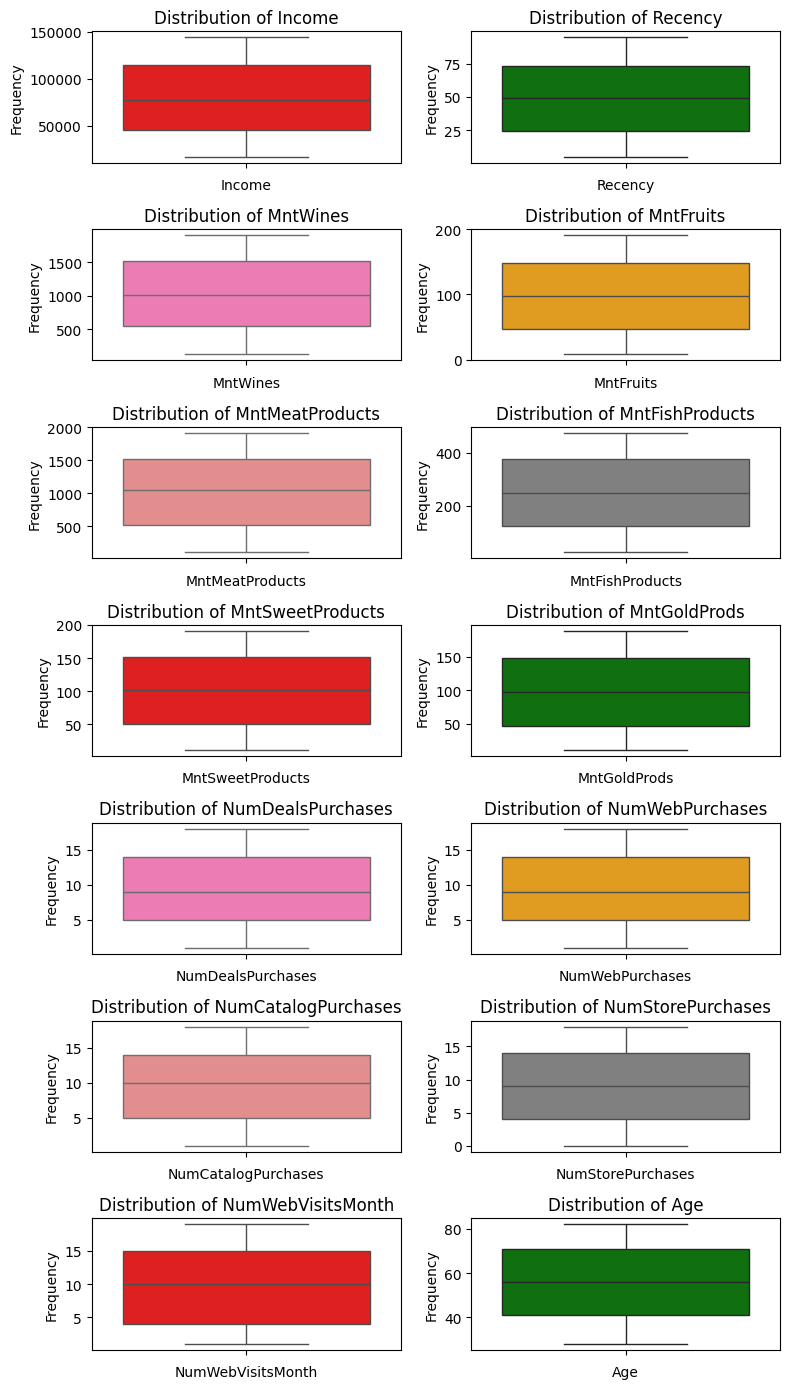

In [42]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange','lightcoral', 'grey','red', 'green']
counter = 0

for i in range(7):
    for j in range(2):
        sns.boxplot(data=df, y = num_columns[counter], color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

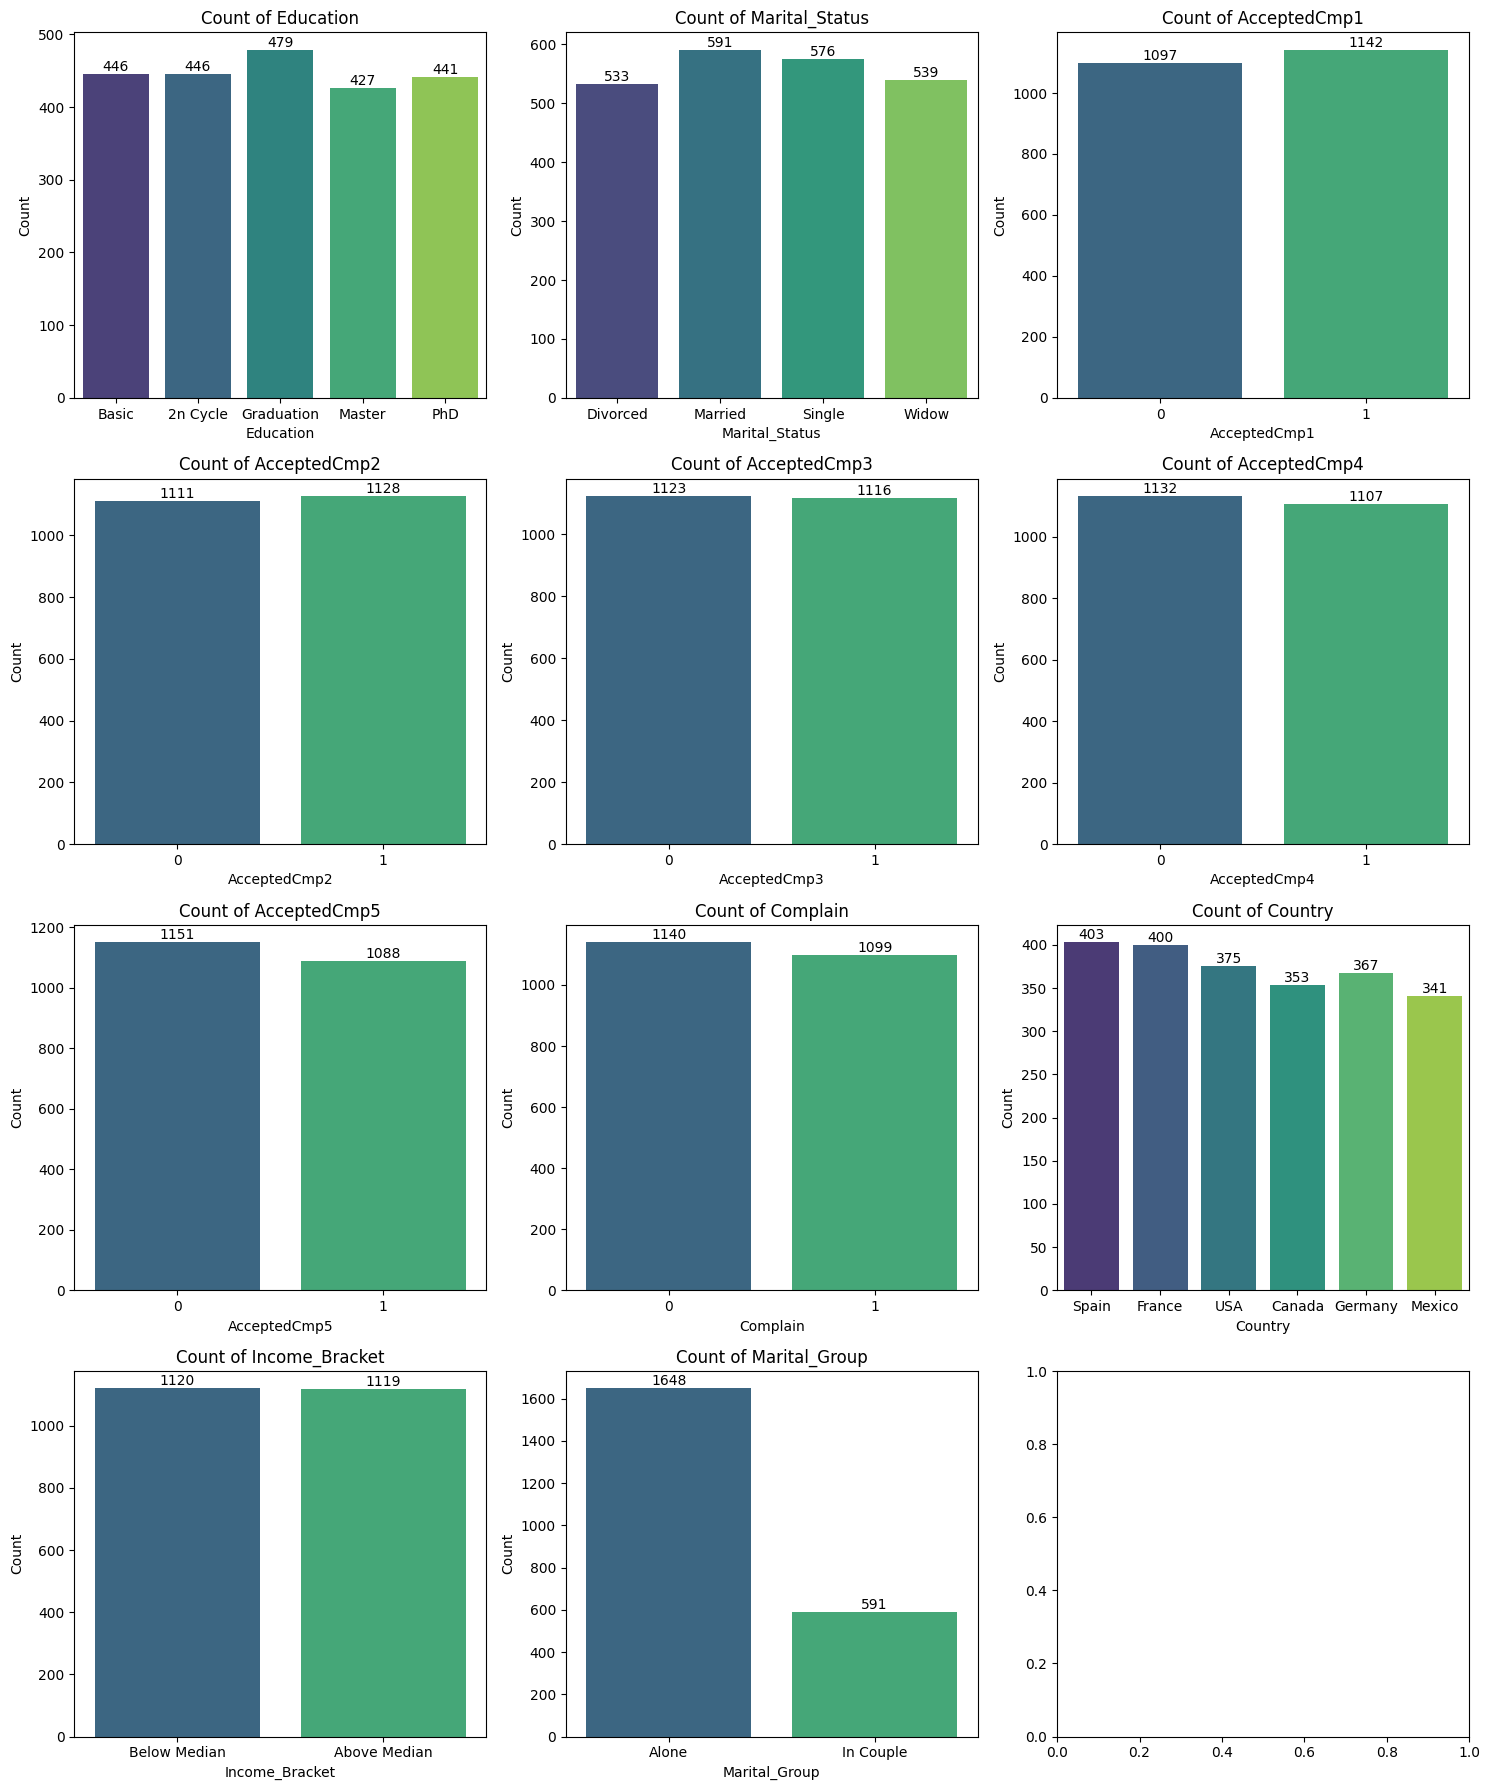

In [43]:
# Count plots for categorical columns
cat_columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Country', 'Income_Bracket', 'Marital_Group']

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15,18))
plot_number = 0
for i in range(4):
  for j in range(3):
    sns.countplot(data = df, x = cat_columns[plot_number],palette='viridis', ax = axes[i,j])
    for p in axes[i,j].containers:
      axes[i,j].bar_label(p)
    axes[i,j].set_title(f"Count of {cat_columns[plot_number]}")
    axes[i,j].set_xlabel(cat_columns[plot_number])
    axes[i,j].set_ylabel('Count')
    plot_number += 1
    if plot_number == 11:
      break
plt.tight_layout()
plt.show()


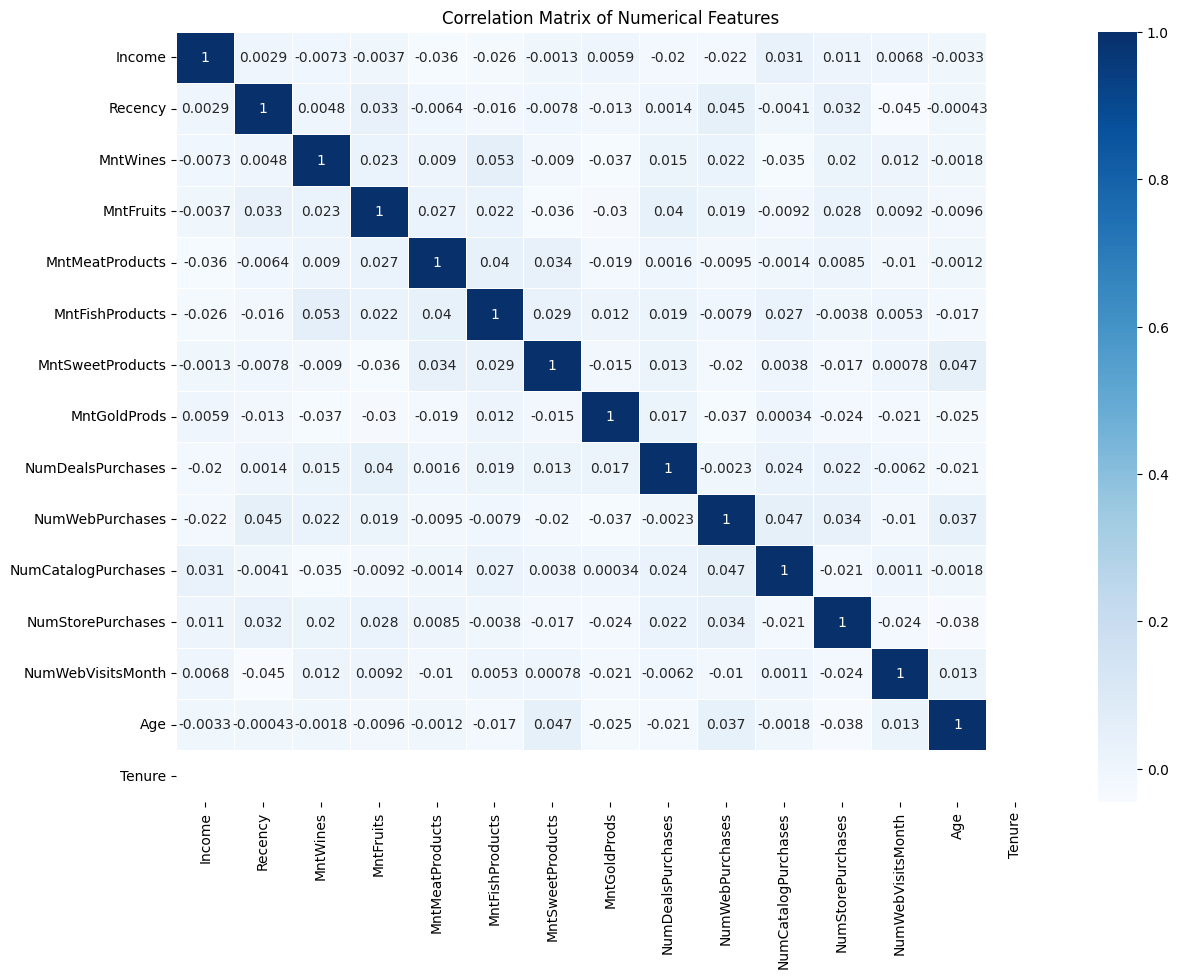

In [45]:
plt.figure(figsize=(14, 10))
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Hypothesis Testing**

**Hypothesis 1: Is income dependent on education?**

**Null Hypothesis (Ho)** - There is no significant dependenc on education and Income.

**Alternate Hypothesis (Ha)** - There is significant dependence on education and Income.

In [46]:
# Chi-square test for independence
contingency_table = pd.crosstab(df['Education'], pd.qcut(df['Income'], q=4))  # Binning income into quartiles
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print(f"Test Statistic : {chi2}", end = "\n")
print(f"p - value : {p}", end ='\n')
print(f"Degree of Freedom : {dof}", end ='\n')
print(f"Expected Table : {expected}")

Test Statistic : 3.8031660250673323
p - value : 0.9867319040568988
Degree of Freedom : 12
Expected Table : [[111.54979902 111.54979902 111.35060295 111.54979902]
 [111.54979902 111.54979902 111.35060295 111.54979902]
 [119.8034837  119.8034837  119.58954891 119.8034837 ]
 [106.79767753 106.79767753 106.6069674  106.79767753]
 [110.29924073 110.29924073 110.1022778  110.29924073]]


In [48]:
alpha = 0.05
if p <= 0.05:
  print("Reject the Null Hypothesis (Ho)")
  print("There is signififcant dependence on education and Income")
else:
  print("Failed to Reject the Null Hypothesis (Ho)")
  print("There is no dependence on education and Income")

Failed to Reject the Null Hypothesis (Ho)
There is no dependence on education and Income


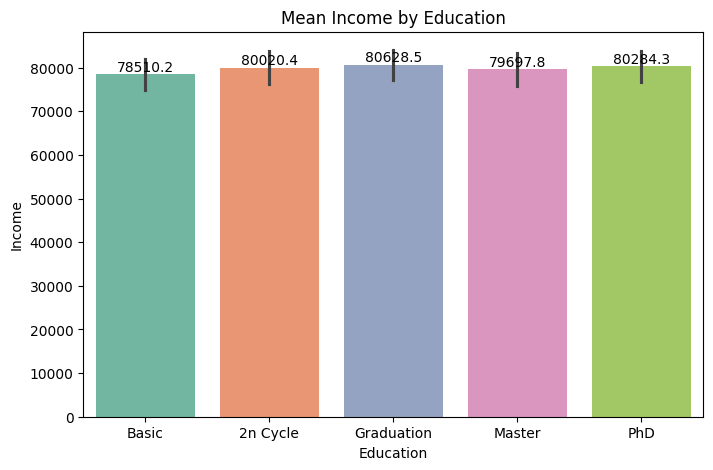

In [49]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(y='Income', x = 'Education', data=df, palette='Set2')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Mean Income by Education')
plt.show()

**Hypothesis 2: Do higher-income people spend more?**

**Null Hypothesis (Ho)** - There is no correlation between Income and Total Spend.

**Alternate Hypothesis (Ha)** - There is significant correlation between Income and Total Spend.

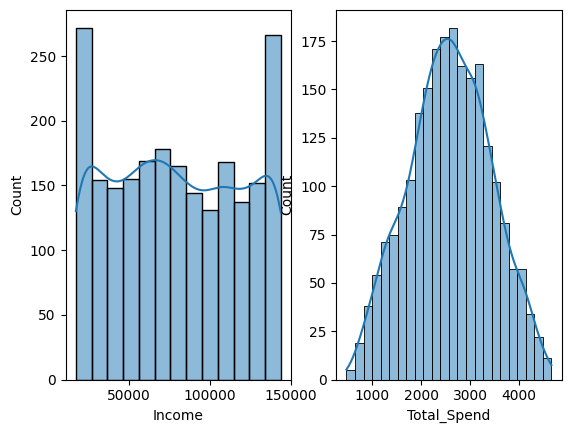

In [50]:
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'Income', kde = True)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'Total_Spend', kde = True)
plt.show()

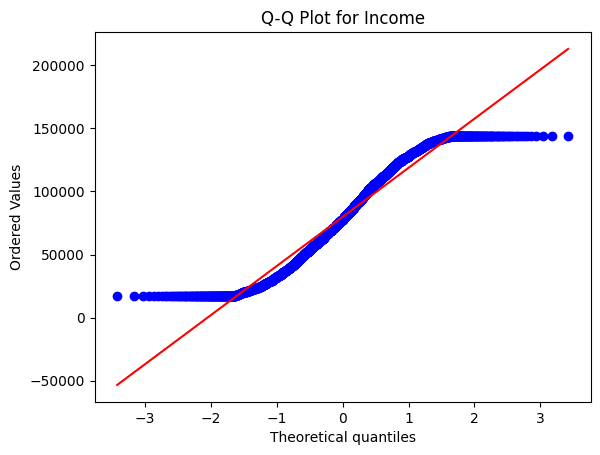

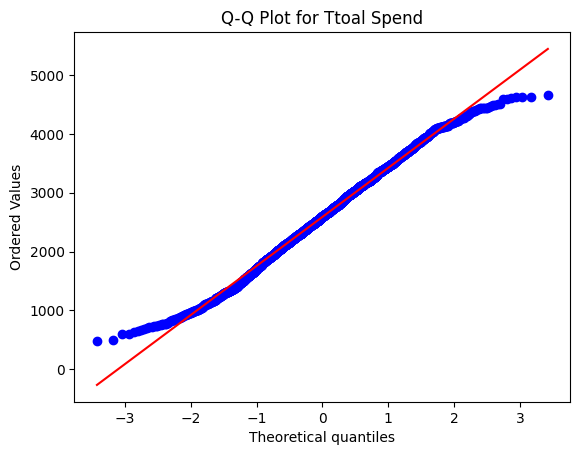

In [51]:
stats.probplot(df['Income'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Income")
plt.show()

stats.probplot(df['Total_Spend'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Ttoal Spend")
plt.show()


In [52]:
# Correlation test (Spearman since is normally distributed)
correlation, p_value = stats.spearmanr(df['Income'], df['Total_Spend'])
print(f'Spearman Correlation: {correlation}, p-value: {p_value}')

Spearman Correlation: -0.033431080596841925, p-value: 0.11377450661671949


In [53]:
alpha = 0.05   # significance of 95% (recommended for no significance is mentioned)
if p_value <= 0.05:
  print("Reject the Null Hypothesis (Ho)")
  print("There is signififcant correlation between Income and Total Spend")
else:
  print("Failed to Reject the Null Hypothesis (Ho)")
  print("There is no significant correlation between Income and Total Spend")

Failed to Reject the Null Hypothesis (Ho)
There is no significant correlation between Income and Total Spend


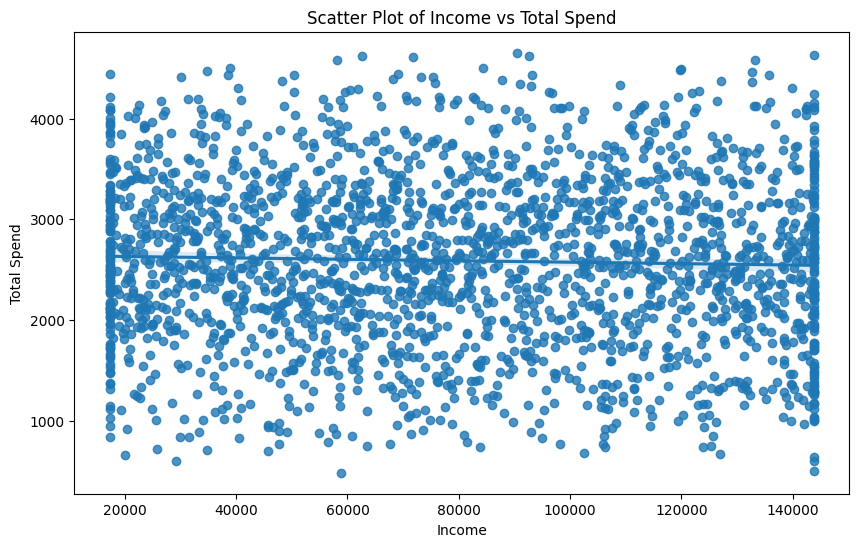

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='Total_Spend', data=df)
plt.title('Scatter Plot of Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

Observation: There is no strong positive monotonic relationship between Income and Total_Spend. This means that as Income increases or decreases, Total_Spend tends to increase.

**Hypothesis 3: Do couples spend more on wine than people living alone?**

**Null Hypothesis (Ho)** : Marital Status doesn't have any dependency on Wine Sales

**Alternate Hypothesis (Ha)** : Marital Status does have dependency on Wine Sales

In [55]:
# Independent t-test
couples = df[df['Marital_Group'] == 'In Couple']['MntWines']
alone = df[df['Marital_Group'] == 'Alone']['MntWines']

t_stat, p_value = stats.ttest_ind(couples, alone)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: -1.3176620429910908, p-value: 0.18775173436910997


In [56]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Marital Status and Wine Sales are dependent")
else:
    print("Failed to reject the null hypothesis")
    print("Marital Status and Wine Sales are independent")

Failed to reject the null hypothesis
Marital Status and Wine Sales are independent


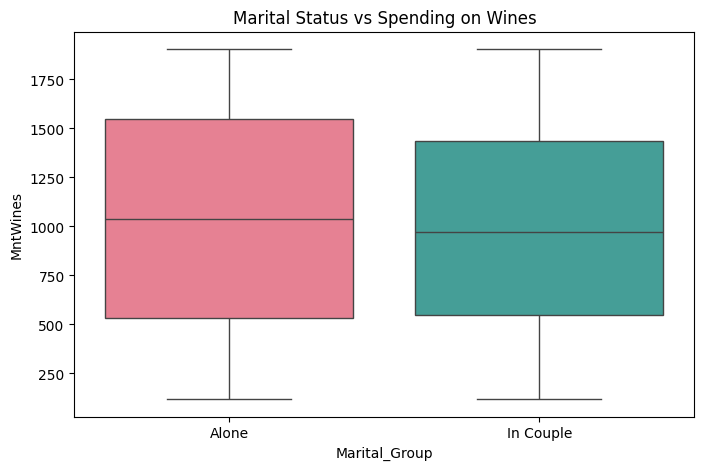

In [57]:
# Marital Status vs Spending on Wines
plt.figure(figsize=(8, 5))
sns.boxplot(x='Marital_Group', y='MntWines', data=df, palette='husl')
plt.title('Marital Status vs Spending on Wines')
plt.show()

**Hypothesis 4: Are lower-income people more attracted to campaigns?**

In [58]:
contingency_table = pd.crosstab(df['Income_Bracket'], df['AcceptedAnyCmp'])
contingency_table

AcceptedAnyCmp,0,1
Income_Bracket,,
Below Median,33,1087
Above Median,34,1085


In [59]:
# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-square Statistic: {chi2}, p-value: {p}')


Chi-square Statistic: 1.377720037575682e-05, p-value: 0.9970384467102535


In [60]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Income Braackets and Campaigns are dependent")
else:
    print("Failed to reject the null hypothesis")
    print("Income Braackets and Campaigns are independent")

Failed to reject the null hypothesis
Income Braackets and Campaigns are independent


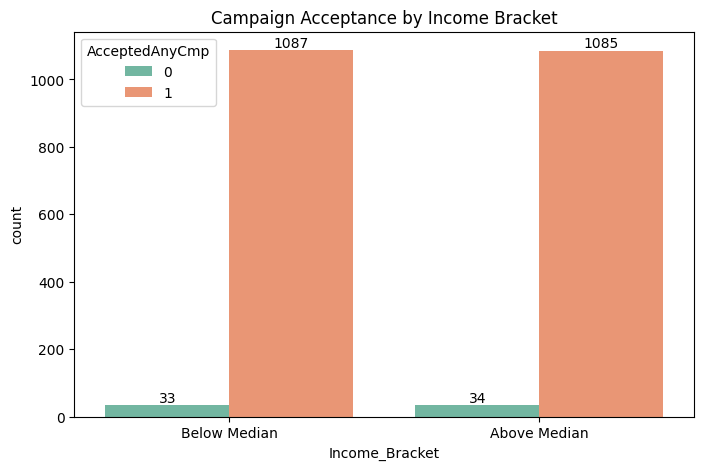

In [61]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Income_Bracket', hue='AcceptedAnyCmp', data=df, palette='Set2')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Campaign Acceptance by Income Bracket')
plt.show()